<br>
<img style="float: left"; src="img\bip.jpeg" width="60">
<br>
<br>
<br>
<br>

# Day 5 - Feature Engineering & Selection

# Content:
[1. Introduction](#1)  <br>
[2. Label encoding](#2)  <br>
[3. One hot encoding](#3)  <br>
[4. Feature scaling](#4)  <br>
[5. Feature selection methods](#5)  <br>
 - [Reduced Variance Feature Selection](#5.1)  <br>
 - [Univariate feature selection](#5.2)  <br>
 - [Principal Component Analysis](#5.3)  <br>
 - [Random Forest](#5.4)  <br>
 - [Lasso regularization](#5.5)  <br>
 - [Recursive Feature Elimination](#5.6)  <br>
 
[6. Unbalanced classes](#6)  <br>

<a id='1'></a>
# 1. Introduction

### Feature engineering
What is a feature and why we need the engineering of it? Basically, all machine learning algorithms use some input data to create outputs. This input data comprise features, which are usually in the form of structured columns. Algorithms require features with some specific characteristic to work properly. Here, the need for **feature engineering** arises. 
Feature engineering efforts mainly have two goals:
- Preparing the proper input dataset, compatible with the machine learning algorithm requirements.
- Improving the performance of machine learning models.

### Feature selection

**Feature selection** is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.

Having irrelevant features in your data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression.

Three benefits of performing feature selection before modeling your data are:

- Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
- Improves Accuracy: Less misleading data means modeling accuracy improves.
- Reduces Training Time: Less data means that algorithms train faster.

### The Dataset: _Credit Card Clients Dataset_

Today we focus on feature engineering and selection techniques applied to the dataset we prepared last lessons.

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

#### Content
There are 28 variables:

- ID: ID of each client

- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

- SEX: Gender (male, female)

- EDUCATION: (0=unknown, 1=graduate school, 2=university, 3=high school, 4=others)

- MARRIAGE: Marital status (unknown, married, single, others)

- AGE: Age in years

- PAY_0: Repayment status in September, 2005 (-2=no consumption, -1=paid in full,0=paid the minimum due amount, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

- PAY_2: Repayment status in August, 2005 (scale same as above)

- PAY_3: Repayment status in July, 2005 (scale same as above)

- PAY_4: Repayment status in June, 2005 (scale same as above)

- PAY_5: Repayment status in May, 2005 (scale same as above)

- PAY_6: Repayment status in April, 2005 (scale same as above)

- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

- default: Default payment (1=yes, 0=no)

- age_group: Age category (young, middle, senior)
 
- credit_lev: Credit level (bronze, silver, gold)

- pay_avg: Average number of payment default months

In [1]:
# first of all we need to import the necessary libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import preprocessing
from data.support import *

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# read the csv file (last version)
df = pd.read_csv("data/UCI_Credit_Card_for_feature_engineering.csv")
df.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,age_group,credit_lev,pay_avg
0,1,20000.0,female,2,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,young,bronze,-0.333333
1,2,120000.0,female,2,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,young,silver,0.500000
2,3,90000.0,female,2,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,young,silver,0.000000
3,4,50000.0,female,2,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,middle,bronze,0.000000
4,5,50000.0,male,2,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,senior,bronze,-0.333333


<a id='2'></a>
# 2. Label encoding

The dataset contain categorical variables. Many machine learning algorithms can support categorical values without further manipulation but there are many more algorithms that do not. Therefore, we have to turn these text attributes into numerical values for further processing.

An approach to encoding categorical values is to use a technique called **label encoding**. Label encoding is simply converting each value in a column to a number.

One trick you can use in pandas is to convert a column to a category, then use those category values for your label encoding:

In [3]:
df['sex'].head()

0    female
1    female
2    female
3    female
4      male
Name: sex, dtype: object

In [4]:
df['sex'].dtypes

dtype('O')

In [5]:
df["sex"] = df["sex"].astype('category')

In [6]:
df['sex'].dtypes

CategoricalDtype(categories=['female', 'male'], ordered=False)

Principal data and metedata are:

In [7]:
print(f"The levels are: {df['sex'].cat.categories}")
print(df['sex'].cat.codes)
print(f"Is the variable ordered? {df['sex'].cat.ordered}")

The levels are: Index(['female', 'male'], dtype='object')
0        0
1        0
2        0
3        0
4        1
        ..
29995    1
29996    1
29997    1
29998    1
29999    1
Length: 30000, dtype: int8
Is the variable ordered? False


Then you can assign the encoded variable to a new column using the `cat.codes` accessor:

In [8]:
df["sex_cat"]=df["sex"].cat.codes
df[["sex","sex_cat"]].head()

,sex,sex_cat
0,female,0
1,female,0
2,female,0
3,female,0
4,male,1


Another trick is to use **LabelEncoder** function from **scikit-learn preprocessing** Python package

In [9]:
le = preprocessing.LabelEncoder()

In [10]:
df["sex_cat"]=le.fit_transform(df['sex'])
df["sex_cat"].head()

0    0
1    0
2    0
3    0
4    1
Name: sex_cat, dtype: int32

In [11]:
#we can inverse label encoding
le.inverse_transform(df["sex_cat"])

array(['female', 'female', 'female', ..., 'male', 'male', 'male'],
      dtype=object)

LabelEncoder can also be used to normalize numerical labels:

In [12]:
le.fit_transform([1, 5, 5, 8])

array([0, 1, 1, 2], dtype=int64)

### Exercise 1

Create a new dataframe and apply label encoding to "credit_lev" variable of previous dataframe.  
Use both pandas and scikit-learn techniques.

*(5 min)*

In [13]:
# Write here your code
df_1 = pd.read_csv("data/UCI_Credit_Card_for_feature_engineering.csv")
df_1["credit_lev_cat1"] = df_1["credit_lev"].astype("category").cat.codes

df_1["credit_lev_cat2"] = le.fit_transform(df["credit_lev"])
df_1[["credit_lev","credit_lev_cat1","credit_lev_cat2"]].head(10)
#df_1["credit_lev"].astype("category").cat.categories

,credit_lev,credit_lev_cat1,credit_lev_cat2
0,bronze,0,0
1,silver,2,2
2,silver,2,2
3,bronze,0,0
4,bronze,0,0
5,bronze,0,0
6,gold,1,1
7,silver,2,2
8,silver,2,2
9,silver,2,2


## Custom binary encoding

Depending on the data set, you may be able to create a binary column that meets your needs for further analysis.

We can use `np.where()`, a numpy function to create a new column that indicates whether or not a specific condition is satisfied:

*np.where(condition, x, y)*: return elements chosen from x or y depending on condition.

In [14]:
df['age_over_50']=np.where(df["age"]>50, 1, 0)
df[['age','age_over_50']].head()

,age,age_over_50
0,24,0
1,26,0
2,34,0
3,37,0
4,57,1


In [15]:
df['age_under_50']=np.where(df["age"]<=50,1,0)
df[['age','age_under_50']].head()

,age,age_under_50
0,24,1
1,26,1
2,34,1
3,37,1
4,57,0


<a id='3'></a>
# 3. One hot encoding

Label encoding has the advantage that it is straightforward but it has the disadvantage that the numeric values can be “misinterpreted” by the algorithms. For example, the value of 0 is obviously less than the value of 1 but does it mean that category 0 is less important than category 1?

A common alternative approach is called **one hot encoding**. The basic strategy is to convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set.

### Exercise 2

Create a new dataframe and apply one hot encoding to "marriage" variable. Create a binary column for each category.

*(5 min)*

In [16]:
# Write here your code
df["marriage_unknown"] = np.where(df["marriage"] == "unknown",1,0)
df["marriage_married"] = np.where(df["marriage"] == "married",1,0)
df["marriage_single"] = np.where(df["marriage"] == "single",1,0)
df["marriage_others"] = np.where(df["marriage"] == "others",1,0)
df[["marriage","marriage_unknown","marriage_married","marriage_single","marriage_others"]].head(10)

,marriage,marriage_unknown,marriage_married,marriage_single,marriage_others
0,married,0,1,0,0
1,single,0,0,1,0
2,single,0,0,1,0
3,married,0,1,0,0
4,married,0,1,0,0
5,single,0,0,1,0
6,single,0,0,1,0
7,single,0,0,1,0
8,married,0,1,0,0
9,single,0,0,1,0


Pandas supports one hot encoding using `get_dummies`. This function is named this way because it creates dummy/indicator variables (aka 1 or 0).

In [17]:
#select sex, marriage, credit level categorical variables
df_cat=df[['sex','marriage','credit_lev']]
df_cat.head()

,sex,marriage,credit_lev
0,female,married,bronze
1,female,single,silver
2,female,single,silver
3,female,married,bronze
4,male,married,bronze


In [18]:
#apply one hot encoding to all the variables
df_dummies=pd.get_dummies(df_cat)
df_dummies.head()

,sex_female,sex_male,marriage_married,marriage_others,marriage_single,marriage_unknown,credit_lev_bronze,credit_lev_gold,credit_lev_silver
0,1,0,1,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,1
2,1,0,0,0,1,0,0,0,1
3,1,0,1,0,0,0,1,0,0
4,0,1,1,0,0,0,1,0,0


**Remember**: one-hot encoding of a categorical variable produces multiple variables that are highly correlated. You should leave out one column, in particular if you prepare data for linear models. For example, `sex_male` column is enough to explain sex variable.

In [19]:
#apply one hot encoding to specific columns
pd.get_dummies(df_cat, columns=['sex','credit_lev']).head()

,marriage,sex_female,sex_male,credit_lev_bronze,credit_lev_gold,credit_lev_silver
0,married,1,0,1,0,0
1,single,1,0,0,0,1
2,single,1,0,0,0,1
3,married,1,0,1,0,0
4,married,0,1,1,0,0


In [20]:
# we can choose how to label the columns using prefix
pd.get_dummies(df_cat, columns=['sex','credit_lev'], prefix=['sex','credit']).head()

,marriage,sex_female,sex_male,credit_bronze,credit_gold,credit_silver
0,married,1,0,1,0,0
1,single,1,0,0,0,1
2,single,1,0,0,0,1
3,married,1,0,1,0,0
4,married,0,1,1,0,0


In [21]:
# we can ask for dropping one dummy column fo each categorical variable
pd.get_dummies(df_cat, columns=['sex','credit_lev'], prefix=['sex','credit'], drop_first=True).head()

,marriage,sex_male,credit_gold,credit_silver
0,married,0,0,0
1,single,0,0,1
2,single,0,0,1
3,married,0,0,0
4,married,1,0,0


Scikit-learn also supports binary encoding by using the OneHotEncoder. The process of creating a pandas DataFrame adds a couple of extra steps. The key point is that you need to use toarray() to convert the results to a format that can be converted into a DataFrame. Therefore, pandas get_dummies() function is recommended

In [22]:
oe = preprocessing.OneHotEncoder()
oe_results = oe.fit_transform(df[["credit_lev"]])
pd.DataFrame(oe_results.toarray(), columns=["credit_" + i for i in oe.categories_]).head()

,credit_bronze,credit_gold,credit_silver
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


One hot encoding is very useful but it can cause the number of columns to expand greatly if you have very many unique values in a column. For the number of values in this example, it is not a problem. However you can see how this gets really challenging to manage when you have many more options.

<a id='4'></a>
# 4. Feature scaling

Feature scaling is performed on **numerical** variables to remove amplitude variation and improve machine learning models performance.

This difference in scale for input variables does not affect all machine learning algorithms.

Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Having features on a similar scale can help the gradient descent converge more quickly towards the minima.

There are also algorithms that are unaffected by the scale of numerical input variables, most notably decision trees and ensembles of trees, like random forest.

## Min-Max Scaling
**Min-Max** is a scaling technique in which values are shifted and rescaled, so that they end up ranging **between 0 and 1**. 

$$X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

This can be achieved using `MinMaxScaler()` of scikit-learn library

In [23]:
min_max_scaler = preprocessing.MinMaxScaler()
df['age_norm']=min_max_scaler.fit_transform(df[['age']])
df[['age','age_norm']].head()

,age,age_norm
0,24,0.051724
1,26,0.086207
2,34,0.224138
3,37,0.275862
4,57,0.620690


In [24]:
df[['age','age_norm']].describe()

,age,age_norm
count,30000.000000,30000.000000
mean,35.485500,0.249750
std,9.217904,0.158929
min,21.000000,0.000000
25%,28.000000,0.120690
50%,34.000000,0.224138
75%,41.000000,0.344828
max,79.000000,1.000000


## Standardization
Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation, so that the **mean** of observed values is **0** and the **standard deviation** is **1**. It is also known as **Z-Score**.

$$z = \frac{X — \mu}{\sigma}$$

### Exercise 3

Compute Z-score value of age variable using scipy.stats package. Then select the first element and check if the answer is correct

*(5 min)*

In [25]:
# Write your code here 
df["age_z"] = stats.zscore(df["age"])
first_value_z_score = df["age_z"][0]

In [26]:
#check the answer with
check_5_3(first_value_z_score)

'Correct answer!'

The same result can be achieved using `StandardScaler()` of scikit-learn library

In [27]:
std_scaler = preprocessing.StandardScaler()
age_std=std_scaler.fit_transform(df[['age']])
age_std

array([[-1.24601985],
       [-1.02904717],
       [-0.16115646],
       ...,
       [ 0.16430256],
       [ 0.59824792],
       [ 1.14067961]])

In [28]:
df['age_std']=age_std
df[['age','age_std']].head()

,age,age_std
0,24,-1.246020
1,26,-1.029047
2,34,-0.161156
3,37,0.164303
4,57,2.334029


In [29]:
df[['age','age_std','age_norm']].describe().round(2)

,age,age_std,age_norm
count,30000.00,30000.00,30000.00
mean,35.49,-0.00,0.25
std,9.22,1.00,0.16
min,21.00,-1.57,0.00
25%,28.00,-0.81,0.12
50%,34.00,-0.16,0.22
75%,41.00,0.60,0.34
max,79.00,4.72,1.00


### Exercise 4

Plot an appropriate visualization for standardized and normalized age distribution

*(10 min)*

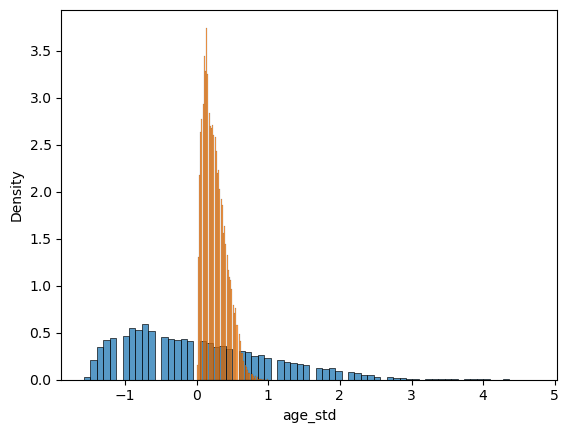

In [30]:
# Write here your code
sns.histplot(df["age_std"], common_norm=True, stat="density");
sns.histplot(df["age_norm"], common_norm=True, stat="density");

<a id='5'></a>
# 5. Feature selection methods

<a id='5.1'></a>
## Reduced Variance Feature Selection

VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

As an example, suppose that we have a dataset with boolean features, and we want to remove all features that are either one or zero (on or off) in more than 80% of the samples. Boolean features are Bernoulli random variables, and the variance of such variables is given by

$$Var[X] = p(1-p) $$

so we can select using the threshold `.8 * (1 - .8)`:

In [31]:
from sklearn.feature_selection import VarianceThreshold

In [32]:
#we use one hot encoded variables as example
df_dummies.head()

,sex_female,sex_male,marriage_married,marriage_others,marriage_single,marriage_unknown,credit_lev_bronze,credit_lev_gold,credit_lev_silver
0,1,0,1,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,1
2,1,0,0,0,1,0,0,0,1
3,1,0,1,0,0,0,1,0,0
4,0,1,1,0,0,0,1,0,0


In [33]:
feature_selection_variance_model = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_selected_features_variance = feature_selection_variance_model.fit_transform(df_dummies)

print("Original data set shape is ", df_dummies.shape)
print("Reduced data set shape is ", X_selected_features_variance.shape)

mask = feature_selection_variance_model.get_support() #list of booleans
print("Selected features = ", df_dummies.columns[mask])
print("Dropped features = ", df_dummies.columns[~mask])

Original data set shape is  (30000, 9)
Reduced data set shape is  (30000, 7)
Selected features =  Index(['sex_female', 'sex_male', 'marriage_married', 'marriage_single', 'credit_lev_bronze', 'credit_lev_gold', 'credit_lev_silver'], dtype='object')
Dropped features =  Index(['marriage_others', 'marriage_unknown'], dtype='object')


<a id='5.2'></a>
## Univariate feature selection
Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator.

ANOVA F-test is an example of univariate statistical test.
Analysis of variance (ANOVA) can determine whether the means of two or more groups are different. ANOVA uses F-tests to statistically test the equality of means

In [34]:
#use credit card dataset
numerical=['age','limit_bal','pay_avg','bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
df_num=df.loc[:,numerical]#numerical variables
X=pd.concat([df_num,df_dummies],axis=1)
y=df['default']#target variable
print(X.shape)
X.head()

(30000, 24)


,age,limit_bal,pay_avg,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,sex_female,sex_male,marriage_married,marriage_others,marriage_single,marriage_unknown,credit_lev_bronze,credit_lev_gold,credit_lev_silver
0,24,20000.0,-0.333333,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,1,0,0,0,1,0,0
1,26,120000.0,0.500000,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,1,0,0,0,1
2,34,90000.0,0.000000,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,1,0,0,0,1
3,37,50000.0,0.000000,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,0,1,0,0,0,1,0,0
4,57,50000.0,-0.333333,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,1,0,0,0,1,0,0


For instance, we can perform a ANOVA F-test to the samples to retrieve only the 4 best features as follows:

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [36]:
feature_selection_univariate_model = SelectKBest(f_classif, k=4)#4 best features

X_selected_features_univariate = feature_selection_univariate_model.fit_transform(X,y)

print("Original data set shape is ", X.shape)
print("Reduced data set shape is ",X_selected_features_univariate.shape)

mask = feature_selection_univariate_model.get_support() #list of booleans
print("Selected features = ",X.columns[mask])
print("Dropped features = ", X.columns[~mask])

Original data set shape is  (30000, 24)
Reduced data set shape is  (30000, 4)
Selected features =  Index(['limit_bal', 'pay_avg', 'credit_lev_bronze', 'credit_lev_gold'], dtype='object')
Dropped features =  Index(['age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'sex_female', 'sex_male', 'marriage_married', 'marriage_others', 'marriage_single', 'marriage_unknown', 'credit_lev_silver'], dtype='object')


<a id='5.3'></a>
## Principal Component Analysis

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

So to sum up, the idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible.

PCA is mathematically a Singular Value Decomposition (SVD). We think of the SVD as decomposing matrix $X$ into orthogonal (i.e. independent) components with strengths given by the diagonal of $\Sigma$,

$$ \Sigma = \left[ \begin{array}{ccc} 
\sigma_1 & \\
& \sigma_2 & \\
&& \ddots & \\
&&&
\end{array} \right]$$

By convention, we assume $|\sigma_1| \ge |\sigma_2| \ge \cdots$.  One interpretation of this is that $\sigma_1$ corresponds to the largest component of variation, $\sigma_2$ corresponds to the second largest etc ... We often think of the smaller components as being just noise and the larger components as being being signal.  Therefore, it makes sense to truncate $\Sigma$ to its largest $m$ components and just keep those.  In Scikit, this algorithm `sklearn.decomposition.PCA` returns $U \Sigma P_m$ where $P_m$ is the projection operator onto the first $m$ dimensions.  (In reality, it performs a stochastic SVD, which should be faster than the exact SVD.)

Geometrically, you can think about this as fitting an m-dimensional ellipsoid to the (originally p-dimensional) data. We expect that the majority of the variance in the data will be explained by the approximation, and any variation along the truncated axes is negligible. **It's important to note that we should choose $m$ according to how much of the variance we want to preserve vs. how much compression we want.**

We can phrase an $m$ dimensional PCA as
$$ \min_{U, \Sigma_m, V} \| X - U \Sigma_m V^T \|_2 $$
where $U$ is a unitary $n \times n$ matrix, $\Sigma_m$ is a diagonal $n \times p$ matrix with rank $m$, and $V$ is a unitary $p \times p$ matrix.


In [37]:
from sklearn.decomposition import PCA

We now apply principal component analysis. Since we need to decide how many component to select and for this purpose we apply PCA and plot the **explained variance ratio** (i.e. the percentage of variance explained by each of the selected components) and the cumulative explained variance.

In [38]:
# Generate some random data
from sklearn.datasets import make_classification

n_features = 20
n_info = 4

X_pca, y_pca = make_classification(n_classes=2, class_sep=2, weights=[0.9, 0.1],
                          n_informative=n_info, n_redundant=(n_features-n_info), flip_y=0.05,
                          n_features=n_features, n_clusters_per_class=1,
                          n_samples=1000, random_state=1)

In [39]:
full_pca_model = PCA()
#standardization
X_std = preprocessing.StandardScaler().fit_transform(X_pca)
full_fitted_model = full_pca_model.fit(X_std)

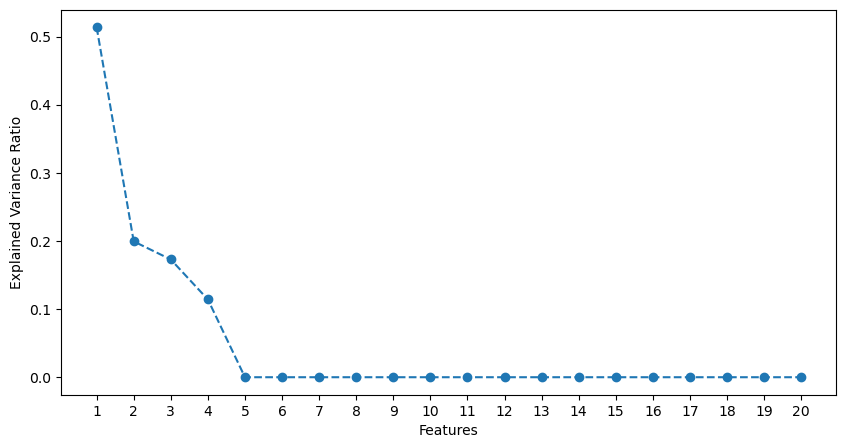

In [40]:
plt.figure(figsize=(10,5))
axis_x = np.arange(1,len(full_fitted_model.explained_variance_ratio_)+1,1)
plt.plot(axis_x, full_fitted_model.explained_variance_ratio_,'--o')
plt.xticks(axis_x)
plt.xlabel("Features")
plt.ylabel("Explained Variance Ratio")
plt.show()

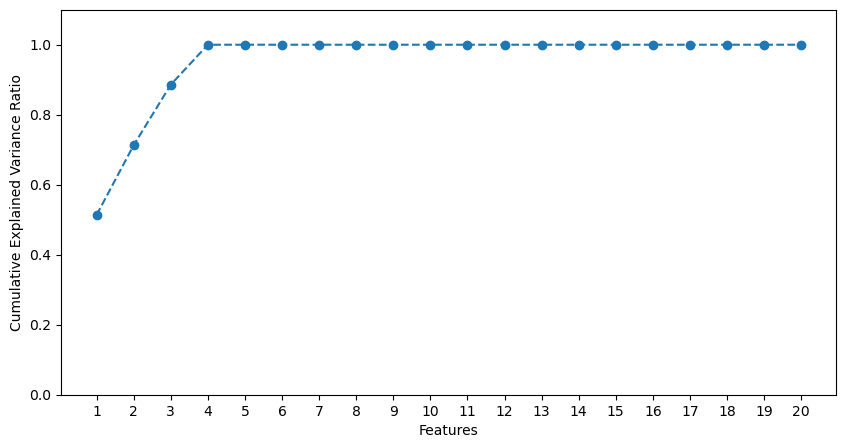

In [41]:
plt.figure(figsize=(10,5))
plt.plot(axis_x, full_fitted_model.explained_variance_ratio_.cumsum(), '--o');
plt.xticks(axis_x);
plt.ylim(0,1.1)
plt.xlabel("Features")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.show()

In [42]:
(pd.DataFrame([np.round(full_fitted_model.explained_variance_ratio_,2), 
               np.round(full_fitted_model.explained_variance_ratio_.cumsum(),2)],
              index = ['Explained Variance Ratio', 'Cumulative Explained Variance Ratio'],
              columns = ['PC_'+str(i) for i in range(1, len(full_fitted_model.explained_variance_ratio_)+1)]).T)

,Explained Variance Ratio,Cumulative Explained Variance Ratio
PC_1,0.51,0.51
PC_2,0.20,0.71
PC_3,0.17,0.89
PC_4,0.11,1.00
PC_5,0.00,1.00
PC_6,0.00,1.00
PC_7,0.00,1.00
PC_8,0.00,1.00
PC_9,0.00,1.00
PC_10,0.00,1.00


As we can note, 4 components can actually explain most of the variance in the data so we apply PCA and select the first 4 components.

In [43]:
principal_df=pd.DataFrame(full_fitted_model.transform(X_std), 
                          columns = ['PC_'+str(i) for i in range(1, len(full_fitted_model.explained_variance_ratio_)+1)]
                         ).iloc[:,:4]
principal_df.head(10)

,PC_1,PC_2,PC_3,PC_4
0,0.657204,-0.855977,1.450956,-0.458512
1,-1.645067,-0.258330,-0.912288,-0.488616
2,2.275569,-1.222175,2.596047,1.304438
3,-1.304366,-0.322002,-0.213151,0.456853
4,0.655462,-2.147034,0.140028,-0.821041
5,1.338089,-1.488271,1.489437,-2.083064
6,-1.422732,-1.226345,-1.860081,0.185399
7,1.199256,-1.790436,1.042735,-2.397276
8,1.195467,-2.366502,0.564401,-1.347408
9,-1.530602,1.390175,1.303525,-1.054774


### Exercise 5

Plot an appropriate visualization of first two principal components

*(5 min)*

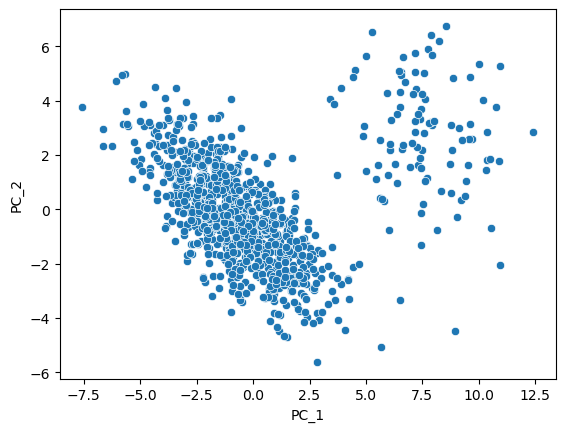

In [44]:
# Write here your code
sns.scatterplot(x=principal_df["PC_1"], y=principal_df["PC_2"]);

<a id='5.4'></a>
## Random Forest

Random forests are one the most popular machine learning algorithms. They are so successful because they provide in general a good predictive performance, low overfitting, and easy interpretability. This interpretability is given by the fact that it is straightforward to derive the importance of each variable on the tree decision. In other words, it is easy to compute how much each variable is contributing to the decision.

Feature selection using Random forest comes under the category of Embedded methods. Embedded methods combine the qualities of filter and wrapper methods. They are implemented by algorithms that have their own built-in feature selection methods

Random forests consist of multiple decision trees, each of them built over a random extraction of the observations from the dataset and a random extraction of the features. Not every tree sees all the features or all the observations, and this guarantees that the trees are de-correlated and therefore less prone to over-fitting. Each tree is also a sequence of yes-no questions based on a single or combination of features. At each node (this is at each question), the three divides the dataset into 2 buckets, each of them hosting observations that are more similar among themselves and different from the ones in the other bucket. Therefore, the importance of each feature is derived from how “pure” each of the buckets is.

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
#use credit card dataset
numerical=['age','limit_bal','pay_avg','bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
df_num=df.loc[:,numerical]#numerical variables
X=pd.concat([df_num,df_dummies],axis=1)
y=df['default']#target variable
print(X.shape)
X.head()

(30000, 24)


,age,limit_bal,pay_avg,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,sex_female,sex_male,marriage_married,marriage_others,marriage_single,marriage_unknown,credit_lev_bronze,credit_lev_gold,credit_lev_silver
0,24,20000.0,-0.333333,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,1,0,0,0,1,0,0
1,26,120000.0,0.500000,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,1,0,0,0,1
2,34,90000.0,0.000000,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,1,0,0,0,1
3,37,50000.0,0.000000,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,0,1,0,0,0,1,0,0
4,57,50000.0,-0.333333,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,1,0,0,0,1,0,0


Feature ranking:
1. feature 2 pay_avg (0.143875)
2. feature 0 age (0.072499)
3. feature 3 bill_amt1 (0.067340)
4. feature 9 pay_amt1 (0.062525)
5. feature 4 bill_amt2 (0.061879)
6. feature 5 bill_amt3 (0.059125)
7. feature 6 bill_amt4 (0.057224)
8. feature 10 pay_amt2 (0.056442)
9. feature 1 limit_bal (0.056359)
10. feature 8 bill_amt6 (0.056315)
11. feature 7 bill_amt5 (0.055771)
12. feature 11 pay_amt3 (0.051067)
13. feature 14 pay_amt6 (0.049318)
14. feature 12 pay_amt4 (0.048562)
15. feature 13 pay_amt5 (0.048047)
16. feature 17 marriage_married (0.008970)
17. feature 19 marriage_single (0.008689)
18. feature 15 sex_female (0.008500)
19. feature 16 sex_male (0.008385)
20. feature 21 credit_lev_bronze (0.007203)
21. feature 22 credit_lev_gold (0.005459)
22. feature 23 credit_lev_silver (0.004360)
23. feature 18 marriage_others (0.001731)
24. feature 20 marriage_unknown (0.000355)


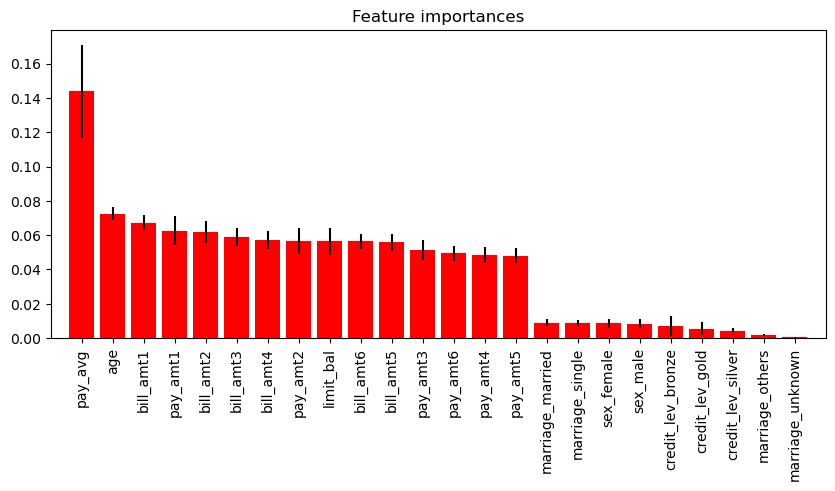

In [47]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X, y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], X.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(10,4))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

A possible limitation of this technique is that correlated features will show in a tree similar and lowered importance, compared to what their importance would be if the tree was built without correlated counterparts.

<a id='5.5'></a>
## Lasso regularization

Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.
Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration.

Here we will do feature selection using **Lasso**. Mathematically, it consists of a linear model with an added regularization term. The objective function to minimize is:

$$(1 / (2 * nsamples)) * ||y - Xw||^2_2 + alpha * ||w||_1$$

where $$||w||_1$$ is the regularization term

If a feature is irrelevant, Lasso penalizes its regularization term and make it 0. Hence the features with term 0 are removed and the rest are taken.

In order to present this method, we use the **diabetes dataset** which is available from within scikit-learn (we can also print its description). Target variable is a quantitative measure (regression problem). Lasso regularization must be applied to regression problems.

In [48]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

We are going to use the `Lasso` linear model from scikit-learn. We set a value of `alpha`, that is the constant that multiplies the regularization term. The model returns the parameter vector `coef_` (w in the cost function formula), aka Lasso coefficients. The features with the highest absolute `coef_` values are considered the most important. 

In [49]:
from sklearn.linear_model import Lasso

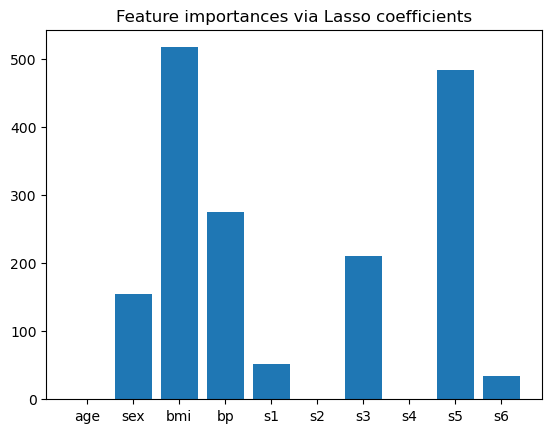

In [50]:
lasso=Lasso(alpha=0.1).fit(X,y)
importance = np.abs(lasso.coef_)
feature_names = np.array(diabetes.feature_names)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via Lasso coefficients")
plt.show()

In [51]:
feature_names[importance==0]

array(['age', 's2', 's4'], dtype='<U3')

Variables "age", "s2", "s4" could be removed from the dataset, having coefficient zero.

<a id='5.6'></a>
## Recursive Feature Elimination

Recursive Feature Elimination (RFE) is a **wrapper-type** feature selection algorithm. This means that a different machine learning algorithm is wrapped by RFE and used to help select features.

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

We are going to use the `RFE` function from scikit-learn, which apply feature ranking with recursive feature elimination. We use the same **diabetes** scikit-learn dataset.The wrapped model is `LinearRegression`, which is an appropriate model to solve regression problems. RFE can also be applied to classification problems.

In [52]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [53]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
selector = RFE(estimator=LinearRegression(), n_features_to_select=6)#The number of features to select
selector = selector.fit(X, y)

In [54]:
#Selected features (equally important, with rank 1)
feature_names[selector.support_]

array(['sex', 'bmi', 'bp', 's1', 's2', 's5'], dtype='<U3')

In [55]:
#Features that could be removed
feature_names[selector.support_==0]

array(['age', 's3', 's4', 's6'], dtype='<U3')

An important hyperparameter for the RFE algorithm is the number of features to select. In the previous section, we used an arbitrary number of selected features (6) which matches the number of informative features in the dataset. In practice, we cannot know the best number of features to select with RFE; instead, it is good practice to test different values.
This can be achieved by performing cross-validation evaluation of different numbers of features and automatically selecting the number of features that resulted in the best mean score. The `RFECV` class implements this for us.

In [56]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

Optimal number of features : 7


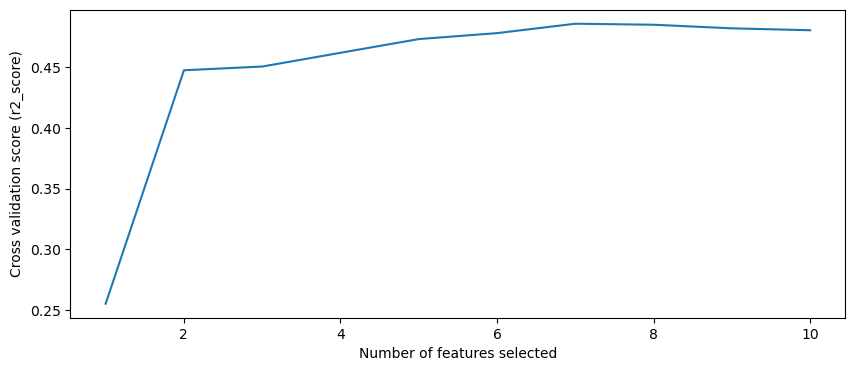

In [75]:
rfecv = RFECV(estimator=LinearRegression(), cv=StratifiedKFold(5),scoring='r2')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,4))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (r2_score)")
#print(rfecv.cv_results_)
grid_results = [rfecv.cv_results_.get("split0_test_score"),rfecv.cv_results_.get("split1_test_score"),rfecv.cv_results_.get("split2_test_score"),rfecv.cv_results_.get("split3_test_score"),rfecv.cv_results_.get("split4_test_score")]
plt.plot(range(1,len(rfecv.cv_results_.get("mean_test_score")) + 1),rfecv.cv_results_.get("mean_test_score"))
plt.show()

In [73]:
#Selected features (equally important, with rank 1)
feature_names[rfecv.support_]

array(['sex', 'bmi', 'bp', 's1', 's2', 's4', 's5'], dtype='<U3')

In [74]:
#Features that could be removed
feature_names[rfecv.support_==0]

array(['age', 's3', 's6'], dtype='<U3')

Variables "age", "s3" and "s6" could be removed from the dataset.

<a id='6'></a>

# 6. Unbalanced Classes

In a binary classification problem, data is said to be unbalanced if there is a large difference in the number of samples representing each class. This situation is very common, arising each time we are dealing with an anomalous rare event. 

When two classes are balanced, a model predicting only one class for every input will be 50% accurate, i.e. will be correct every other time. As the imbalance increases, a model predicting the majority class will appear to be more and more accurate, which could have serious consequences if not properly diagnosed and handled. 



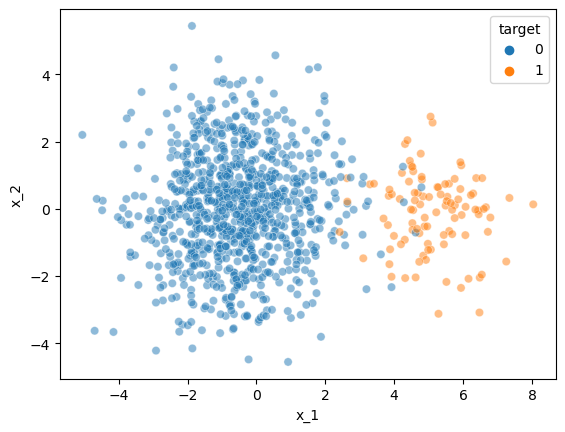

In [80]:
# from https://github.com/glemaitre/UnbalancedDataset
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification


# Generate some data
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.9, 0.1],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=1000, random_state=120)

# Instantiate a PCA object for the sake of easy visualisation
pca = PCA(n_components = 2)

# Fit and transform x to visualise inside a 2D feature space
x_vis = pca.fit_transform(X)

# Plot the two classes
df_plot = pd.concat([pd.DataFrame(x_vis, columns = ['x_1', 'x_2']), pd.Series(y, name='target')], axis=1)
sns.scatterplot(data=df_plot, x='x_1', y='x_2', hue='target', alpha=0.5);

In [77]:
pd.Series(y).value_counts(normalize = False)

0    900
1    100
dtype: int64

## Simple techniques to deal with unbalanced data

There are several techniques to deal with unbalanced classes.

## Collect more data
Can you collect more samples of the minority class in order to have a better representation of it?


## Undersampling
When lots of data is present, a simple and effective strategy to deal with imbalance is to simply discard a random subset of the majority class, effectively undersampling it.
- Pros: quick, easy to implement, lower load on model training because of less data
- Cons: potentially losing important information

In [81]:
from imblearn.under_sampling import RandomUnderSampler

US = RandomUnderSampler(sampling_strategy='majority', random_state=0)
usx, usy = US.fit_resample(X, y)
usx_vis = pca.transform(usx)

# plot
df_plot = pd.concat([pd.DataFrame(usx_vis, columns = ['x_1', 'x_2']), pd.Series(usy, name='target')], axis=1)
sns.scatterplot(data=df_plot, x='x_1', y='x_2', hue='target', alpha=0.5)

# plt.scatter(usx_vis[usy==0, 0], usx_vis[usy==0, 1], label="Class #0", alpha=0.5,
#             facecolor=palette[0], linewidth=0.15)
# plt.scatter(usx_vis[usy==1, 0], usx_vis[usy==1, 1], label="Class #1", alpha=0.5,
#             facecolor=palette[2], linewidth=0.15)
plt.title('Random under-sampling')
plt.show();

ModuleNotFoundError: No module named 'sklearn.cluster'

In [ ]:
pd.Series(usy).value_counts(normalize = False)

## Oversampling
Similarly, using more copies of the data in the minority class can also be an effective strategy.
- Pros: retaining all available information
- Cons: more data, not necessarily more information if minority class is not well represented

In [ ]:
from imblearn.over_sampling import RandomOverSampler

OS = RandomOverSampler(sampling_strategy='minority', random_state=0)
osx, osy = OS.fit_resample(X, y)
osx_vis = pca.transform(osx)

# plot
df_plot = pd.concat([pd.DataFrame(osx_vis, columns = ['x_1', 'x_2']), pd.Series(osy, name='target')], axis=1)
sns.scatterplot(data=df_plot, x='x_1', y='x_2', hue='target', alpha=0.1)

# plt.scatter(osx_vis[osy==0, 0], osx_vis[osy==0, 1], label="Class #0", alpha=0.5,
#             facecolor=palette[0], linewidth=0.15)
# plt.scatter(osx_vis[osy==1, 0], osx_vis[osy==1, 1], label="Class #1", alpha=0.5,
#             facecolor=palette[2], linewidth=0.15)
plt.title('Random over-sampling')
plt.show();

In [ ]:
pd.Series(osy).value_counts(normalize = False)

## Synthetic data augmentation
There are several techniques to create synthetic samples starting from the minority class. The most common are *SMOTE (Synthetic Minority Over-sampling Technique)*, and its variants. 

SMOTE creates synthetic samples from the minority class using a nearest neighbor technique. The algorithm selects two or more similar instances (using a distance measure) and it creates a new sample whose features are a linear combination of the neighbors features, with a random mixing parameter.

In [82]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', random_state=0)
# smote = SMOTE(sampling_strategy=1, random_state=0)
smox, smoy = smote.fit_resample(X, y)
smox_vis = pca.transform(smox)


# plot
df_plot = pd.concat([pd.DataFrame(smox_vis, columns = ['x_1', 'x_2']), pd.Series(smoy, name='target')], axis=1)
sns.scatterplot(data=df_plot, x='x_1', y='x_2', hue='target', alpha=0.5)

# plt.scatter(smox_vis[smoy==0, 0], smox_vis[smoy==0, 1], label="Class #0", alpha=0.5,
#             facecolor=palette[0], linewidth=0.15)
# plt.scatter(smox_vis[smoy==1, 0], smox_vis[smoy==1, 1], label="Class #1", alpha=0.5,
#             facecolor=palette[2], linewidth=0.15)
plt.title('SMOTE')
plt.show();

ImportError: cannot import name 'SMOTE' from 'imblearn.over_sampling' (unknown location)

In [ ]:
pd.Series(smoy).value_counts(normalize = False)

# Session completed
--------

### Exercise 6

We have the following dataset **House Prices** from a well-known Kaggle competition (see details [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data))


*(40 min)*

In [83]:
df_house=pd.read_csv("data/house_prices.csv")
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**1.** Select the **numeric** variables (*exclude target variable "SalePrice" and "Id" variable*)

*(5 min)*

In [90]:
# Write here your code
new_df = df_house.select_dtypes(include = [np.number]).drop(["SalePrice","Id"],axis=1)


MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

**2.** Handle missing values using **single inputation** method (**mean** substitution)

*(5 min)*

In [102]:
# Write here your code
new_df["LotFrontage"].fillna(new_df["LotFrontage"].mean(), inplace=True)
new_df["GarageYrBlt"].fillna(new_df["GarageYrBlt"].mean(), inplace=True)
new_df["MasVnrArea"].fillna(new_df["MasVnrArea"].mean(), inplace=True)
new_df.isna().sum().sum()

0

**3.** Rank features using **Random Forest** classifier. Which is the most important feature?

*(15 min)*

In [103]:
forest = RandomForestClassifier(random_state=42)

In [106]:
# Write here your code
forest.fit(new_df,df_house["SalePrice"])
np.argmax(forest.feature_importances_)

2

In [107]:
# Insert here the solution
most_important_feature="LotArea"

In [108]:
#Check the answer with
check_5_6_3(most_important_feature)

'Correct answer!'

**4.** Select the 8 most important features using **RFE** method (with Linear Regression estimator)

*(10 min)*

In [112]:
# Write here your code
selector = RFE(estimator=LinearRegression(), n_features_to_select = 8)
selector = selector.fit(new_df,df_house["SalePrice"])
np.array(new_df.columns)[selector.support_]

array(['OverallQual', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars'],
      dtype=object)

**5.** Plot the **correlation** matrix. Which is the feature with the highest correlation w.r.t. the target variable?

*(5 min)*

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.334901
BsmtFinSF1       0.386420
Fireplaces       0.466929
GarageYrBlt      0.470177
MasVnrArea       0.475241
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

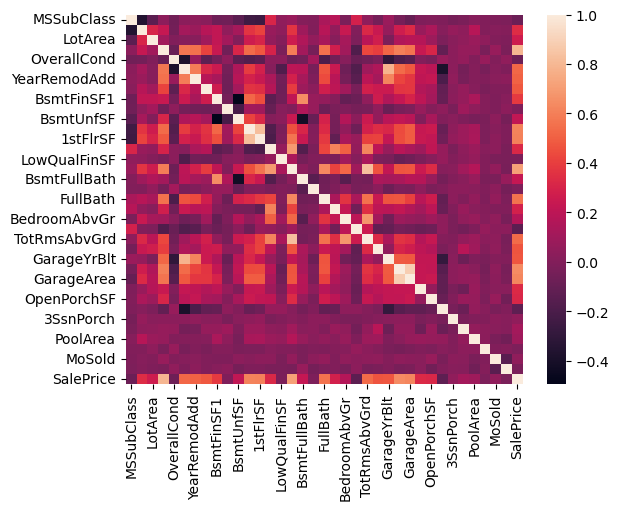

In [124]:
# Write here your code
import seaborn as sns
sns.heatmap(pd.concat([new_df,df_house["SalePrice"]], axis=1).corr());
pd.concat([new_df,df_house["SalePrice"]], axis=1).corr()["SalePrice"].sort_values()


In [125]:
# Insert here the solution
most_correlated = "OverallQual"

In [126]:
#Check the answer with
check_5_6_5(most_correlated)

'Correct answer!'

### Exercise 7

Now you will use a dataset very similar to the one just seen and you will perform a series of **features transformations**.

*(40 min)*

In [127]:
df = pd.read_csv("data/ames_feat_eng.csv")

In [128]:
df.head()

,MSSubClass,LotArea,Neighborhood,BldgType,FirstFlrSF,SecondFlrSF,GrLivArea,TotRmsAbvGrd,WoodDeckSF,OpenPorchSF,EnclosedPorch,Threeseasonporch,ScreenPorch
0,One_Story_1946_and_Newer_All_Styles,31770,North_Ames,OneFam,1656,0,1656,7,210,62,0,0,0
1,One_Story_1946_and_Newer_All_Styles,11622,North_Ames,OneFam,896,0,896,5,140,0,0,0,120
2,One_Story_1946_and_Newer_All_Styles,14267,North_Ames,OneFam,1329,0,1329,6,393,36,0,0,0
3,One_Story_1946_and_Newer_All_Styles,11160,North_Ames,OneFam,2110,0,2110,8,0,0,0,0,0
4,Two_Story_1946_and_Newer,13830,Gilbert,OneFam,928,701,1629,6,212,34,0,0,0


**1.** Create the following features:

- `LivLotRatio`: the ratio of `GrLivArea` to `LotArea`

- `Spaciousness`: the sum of `FirstFlrSF` and `SecondFlrSF` divided by `TotRmsAbvGrd`

- `TotalOutsideSF`: the sum of `WoodDeckSF`, `OpenPorchSF`, `EnclosedPorch`, `Threeseasonporch`, and `ScreenPorch`


*(5 min)*

In [132]:
# Write here your code

df["LivLotRatio"] = [df["GrLivArea"][x]/df["LotArea"][x] for x in range(len(df))]
df["Spaciousness"] = [(df["FirstFlrSF"][x]+df["SecondFlrSF"][x])/df["TotRmsAbvGrd"][x] for x in range(len(df))]
df["TotalOutsideSF"] = [(df["WoodDeckSF"][x]+df["OpenPorchSF"][x]+df["EnclosedPorch"][x]+df["Threeseasonporch"][x]+df["ScreenPorch"][x]) for x in range(len(df))]


**2.** We discovered an interaction between `BldgType` and `GrLivArea`. Create their interaction features.

*(10 min)*

In [ ]:
# Write here your code

**3.** Let's try creating a feature that describes how many kinds of outdoor areas a dwelling has. Create a feature `PorchTypes` that counts how many of the following are greater than `0.0`:

```
WoodDeckSF
OpenPorchSF
EnclosedPorch
Threeseasonporch
ScreenPorch
```

*(5 min)*

In [134]:
# Write here your code
df["PorchTypes"] = [(df["WoodDeckSF"][x]>0)+(df["OpenPorchSF"][x]>0)+(df["EnclosedPorch"][x]>0)+(df["Threeseasonporch"][x]>0)+(df["ScreenPorch"][x]>0) for x in range(len(df))]
df["PorchTypes"]

0        True
1        True
2        True
3       False
4        True
        ...  
2925     True
2926     True
2927     True
2928     True
2929     True
Name: PorchTypes, Length: 2930, dtype: bool

**4.** `MSSubClass` describes the type of a dwelling:

In [ ]:
pd.Series(df.MSSubClass.unique())

You can see that there is a more general categorization described (roughly) by the first word of each category. 

Create a feature containing only these first words by splitting MSSubClass at the first underscore _.

*(10 min)*

In [ ]:
# Write here your code

**5.** The value of a home often depends on how it compares to typical homes in its neighborhood. 

Create a feature `MedNhbdArea` that describes the median of `GrLivArea` grouped on `Neighborhood`.

*(10 min)*

In [ ]:
# Write here your code